# Aprendizaje Supervisado con Scikit-Learn - Estudiante

Antes que nada, vamos a comprobar las versiones de las diferentes librerías que vamos a estar utilizando a lo largo de las clases:

In [1]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 22:33:48) 
[GCC 7.3.0]
pandas version: 0.25.3
matplotlib version: 3.1.2
NumPy version: 1.17.3
SciPy version: 1.3.1
IPython version: 7.10.1
scikit-learn version: 0.21.3


Por último, vamos a desactivar los mensajes de advertencia *`DeprecationWarnings`*, ya que no afectan en nada al código ni nuestros objetivos formativos para las clases:

In [2]:
# Importamos un filtro de warnings
from warnings import simplefilter
# Ignoramos los DeprecationWarnings, en concreto el del módulo six.py
simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
# Hacemos ciertas configuraciones iniciales
%matplotlib inline
from preamble import *

## Lab 0 - Datasets de ejemplo

### Forge Dataset

Text(0, 0.5, 'característica 2')

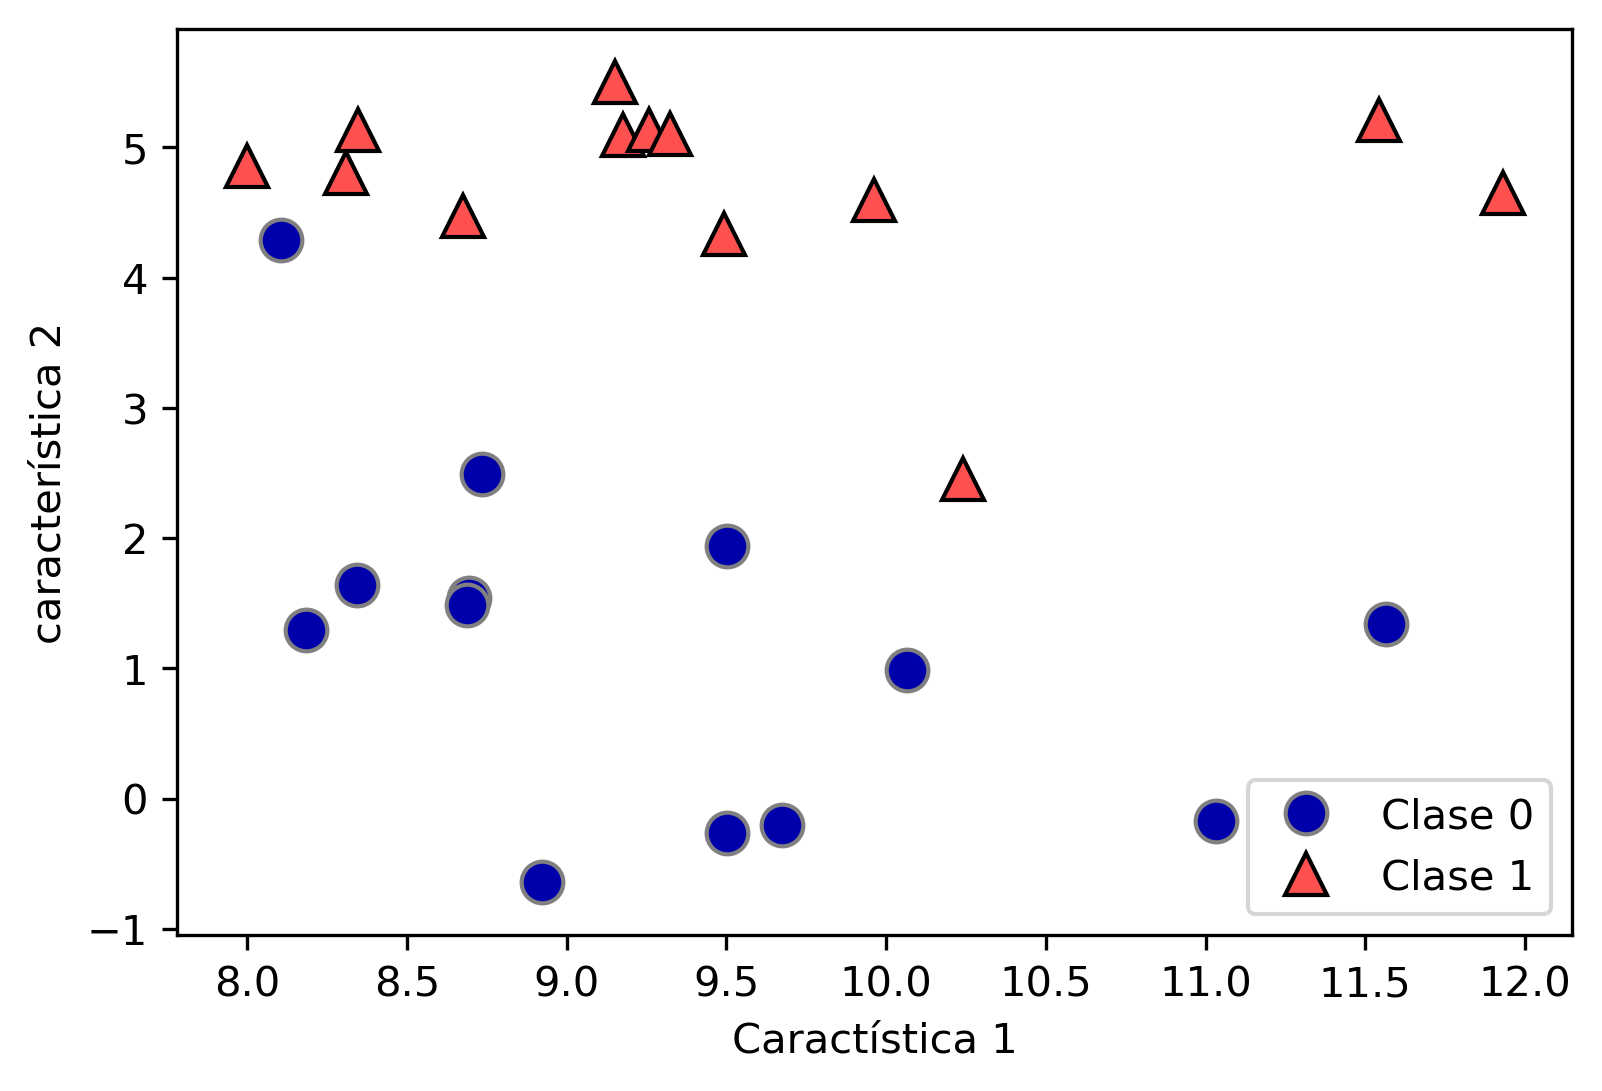

In [4]:
# Generamos un dataset
X, y = mglearn.datasets.make_forge() # Característica, Característica
# Lo pintamos
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Clase 0", "Clase 1"], loc=4)
plt.xlabel("Caractística 1")
plt.ylabel("característica 2")

¿Cuántos datapoints y características tiene este Dataset $X$? Utiliza Numpy para saber la respuesta, apóyate en el método `type()` de Python si necesitas saber qué métodos puedes utilizar sobre él, así como la combinación `Tab` y `Shift-Tab` para conocer la documentación de los diferentes métodos disponibles:

In [5]:
# Escribe la línea de código abajo

In [5]:
print('x.shape:', X.shape)

x.shape: (26, 2)


In [6]:
type(X)

numpy.ndarray

#### Dataset Wave

Utilizaremos otro dataset llamado *Wave* para los ejemplos básicos de regresión supervisada. Igualmente, utilizamos un dataset muy sencillo, de pocas dimensiones que nos ayude a visualizar y a desarrollar una intuición sobre nuestros modelos.

Text(0, 0.5, 'Objetivo')

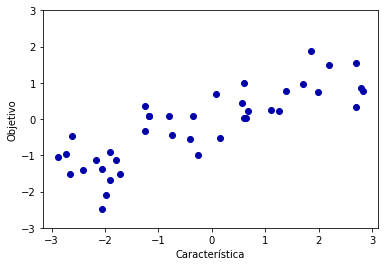

In [11]:
# Generamos un dataset
X, y = mglearn.datasets.make_wave(n_samples=40) #Inputs, Outputs
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Característica")
plt.ylabel("Objetivo")

#### Un ejemplo real: Wisconsin Breast Cancer Dataset

In [13]:
# Importa y muestra las claves del breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys() #.keys porque la estructura de los datasets de sklearns son diccionarios

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
# Muestra el tipo de datos que carga el dataset
type(cancer) #es un diccionario extendido, es un nuevo tipo de dato que no habíamos visto
# por eso no funciona pandas aquí, porque es un data frame

sklearn.utils.Bunch

In [16]:
# Muestra las dimensiones del dataset
cancer.data.shape

(569, 30)

Imprimimos ahora el conteo de etiquetas en el dataset:

In [18]:
# Muestra el conteo de etiquetas
print('conteo de muestras por clase:\n', {n: v for n,v in zip(cancer.target_names,np.bincount(cancer.target))})

conteo de muestras por clase:
 {'malignant': 212, 'benign': 357}


Obtener una descripción del significado de cada una de las características:

In [21]:
#Muestra descripción de características
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

#### Otro ejemplo real: Boston Housing Dataset
El objetivo de este dataset es predecir el valor medio de las casas en varios barrios de Boston en la década de los '70 usando información como la tasa de criminalidad, proximidad al río Charles, acceso a autovías, etc.

In [26]:
# Carga el dataset y muestra sus dimensiones
from sklearn.datasets import load_boston
boston=load_boston()
boston.data.shape #(features,muestras)

(506, 13)

In [28]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

A efectos de utilizar este dataset, es mejor complementarlo considerando no sólo las 13 características iniciales, sino todos los productos entre características (llamados también *interacciones*).  El incluir características derivadas como estas se llama **Ingeniería de características(como mejoro el modelo a través de la modificación de las características)**. El dataset ampliado puede cargarse gracias a la función `load_extended_boston`.

In [30]:
X, y = mglearn.datasets.load_extended_boston() # para desarrollar modelos más ricos
print("X.shape:", X.shape)

X.shape: (506, 104)


## Lab 1 - k-Nearest Neighbors
### Clasificación k-NN

Usemos para empezar nuestro dataset *Forge*. Primero, separamos los datos en un set de training y de test para poder evaluar el rendimiento del modelo:

In [32]:
#Importa el splitter de datasets de sklearn
from sklearn.model_selection import train_test_split
# Asigna datasets y etiquetas
X, y = mglearn.datasets.make_forge()   # un data set para empezar a jugar esto es una función que se mete así para las caracteriscticas y etiqetas de  x e y

# Asigna training y test a datasets y etiquetas
# Usa la variable random_state=0 como parámetro
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

Importa e instancia la clase con tres vecinos:

In [33]:
# Importa el clasificador KNeighbors
from sklearn.neighbors import KNeighborsClassifier

# instancia la clase con 3 vecinos
clf = KNeighborsClassifier(n_neighbors=3)

Finalmente, entrenamos el modelo usando el juego de datos de entrenamiento.

In [34]:
# Entrena el modelo
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
# Muestra el resultado de las predicciones sobre el juego de pruebas
print("Predicciones sobre el juego de pruebas:", clf.predict(X_test))#quiero sacar la y sombrero

Predicciones sobre el juego de pruebas: [1 0 1 0 1 0 0]


In [37]:
# Muestra al precisión sobre el juego de pruebas, compara con y_test
print("Precisión sobre el juego de pruebas: {:.2f}".format(clf.score(X_test,y_test)))
#significa que hay 86% de tasa de acierto

Precisión sobre el juego de pruebas: 0.86


### Análisis de KNeighborsClassifier

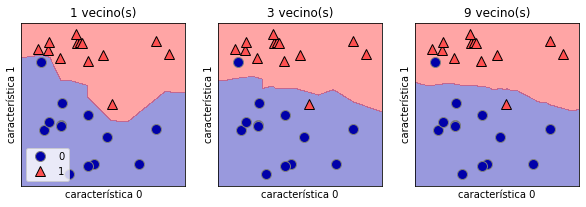

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes): #predicción para 1 vecino, 3 y 9, 
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} vecino(s)".format(n_neighbors))
    ax.set_xlabel("característica 0")
    ax.set_ylabel("característica 1")
axes[0].legend(loc=3)

**Pregunta**: ¿qué diferencias observas en la frontera de clasificación y qué puede decirse del uso de varios vecinos frente al uso de uno sólo?
con un vecino está generalizando muy poco, con 9 vecinos está generalizando mucho. La mejor opción es la de 9 vecinos, pero generalizar demasiado, por ejemplo 28 vecinos (sobre 30) es demasiado, te equivocas mucho. El punto medio es lo bueno, aunque cuando generalizas tienes que asumir algún error como en el gráfico, es el coste 

Vamos a evaluar ahora la conexión entre complejidad y generalización usando un dataset real (Breast Cancer Dataset):

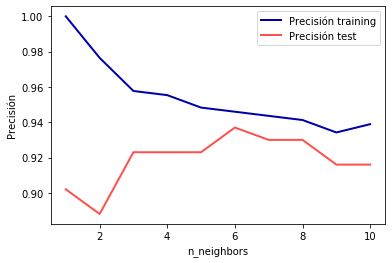

In [40]:
# Importa el dataset
from sklearn.datasets import load_breast_cancer

# Instancia el modelo
cancer = load_breast_cancer()
# Crea training y test datasets y etiquetas.
# Usa los parámetros stratify=cancer.target, random_state=66
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
#stratify: considera que cuando haces el split que no caigan todos los malignos o benignos,
#evitar concentración de variables en el data test
# Creamos vaiables para almacenar precisión
training_accuracy = []
test_accuracy = []
# Probamos n_neighbors de 1 a 10
neighbors_settings = range(1, 11)

# Itera para diferentes vecinos
for n_neighbors in neighbors_settings:
    # Construimos el modelo
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # Guardamos la precisión del training set
    training_accuracy.append(clf.score(X_train,y_train))
    # Guardamos la precisión de testing set (generalización)
    test_accuracy.append(clf.score(X_test,y_test))


# Finalmente, pintamos 
plt.plot(neighbors_settings, training_accuracy, label="Precisión training")
plt.plot(neighbors_settings, test_accuracy, label="Precisión test")
plt.ylabel("Precisión")
plt.xlabel("n_neighbors")
plt.legend()

¿Reconoces las características de las curvas  de complejidad frente a precisión que vimos al principio? (Nótese que por el eje de ordenadas, la curva correspondiente al training set está invertida)

**¿Qué numero de vecinos es el mejor para obtener el mejor rendimiento del modelo?**

In [ ]:
#el numero de vecinos óptimo es 6

### Regresión k-NN
También hay una variante de regresión de k-Nearest Neighbors. De nuevo, comparemos el uso de un solo vecino frente a tres para ver la variación de las predicciones(numéricas, no de clasificación como antes):

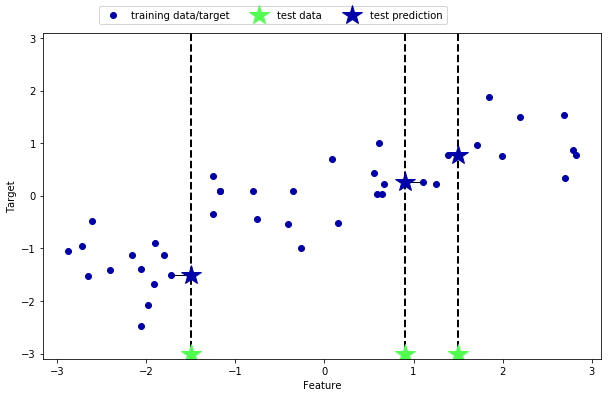

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

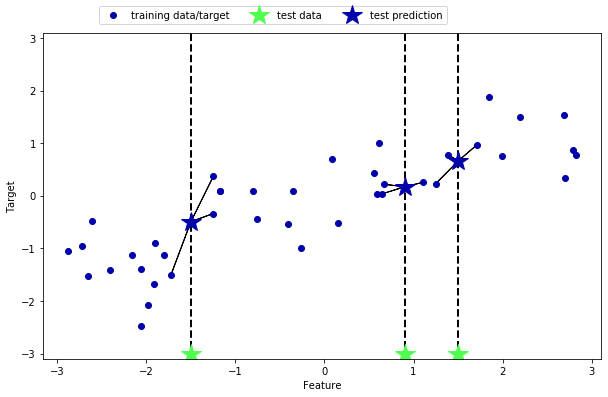

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

La implementación de kNN para regresión en Scikit-learn es muy parecida a su equivalente de clasificación. Lo hacemos aquí para el *Wave* dataset:

In [58]:
# Importa el regressor KNeighbors
from sklearn.neighbors import KNeighborsRegressor
# Carga dataset y labels con el parámetro n_samples=40
X, y = mglearn.datasets.make_wave(n_samples=400) # función de ayuda para generar un dataset de ejemplo

# Partimos el dataset wave en training y test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)# el 0 le ponemos para que todos veamos el mismo resultado

# Instanciamos el modelo y especificamos 3 vecinos
reg = KNeighborsRegressor(n_neighbors=3)
# Entrenamos el modelo usando los objetivo y datos de training
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [59]:
Mostramos el resultado de las predicciones sobre el juego de test:

SyntaxError: invalid syntax (<ipython-input-59-e208996db857>, line 1)

In [60]:
# Muestra el resultado de las predicciones sobre test
print("Predicciones sobre el test set:\n", reg.predict(X_test) )

Predicciones sobre el test set:
 [-0.98  -0.252 -0.658  0.337 -0.923 -0.323 -0.859  1.088 -0.781  0.348
 -1.525  0.628  1.62  -0.478  1.834  0.303 -0.476  1.041 -1.525  1.167
  0.246 -0.476 -0.901 -1.315 -1.176  1.041 -0.476 -1.849 -0.658  0.066
  0.291  0.024 -0.799 -0.637  0.522  0.926 -0.98  -0.901 -1.559  0.402
 -0.781 -0.215 -1.004  0.345 -0.804  0.691 -0.592  0.898 -0.859  0.251
  1.05  -0.047 -0.98  -1.221  1.241 -1.091  0.881 -0.968 -1.307 -0.028
  0.822  1.299 -1.091 -0.977  0.978 -1.221 -0.525 -1.091  1.088 -0.71
  1.299  0.732 -0.775  0.732  0.402 -1.352  0.285  0.198  0.651 -0.619
  1.452 -0.101  0.618 -1.093 -1.155  0.257  0.051 -0.12   0.667  0.876
 -0.98   0.063 -0.551  0.496 -1.408  0.797  0.303  1.088  0.794  0.881]


In [61]:
print("Coeficiente de determinación del test set: {:.2f}".format(reg.score(X_test,y_test)))


Coeficiente de determinación del test set: 0.68


### Análisis de KNeighborsRegressor

Para establecer el análisis, vamos a hacer una predicción de todos los posibles valores que puede tener la característica $x$ (donde $x\in[1,3000]$), y para ello creamos un dataset que tenga todos los puntos en una línea:

1
3
9


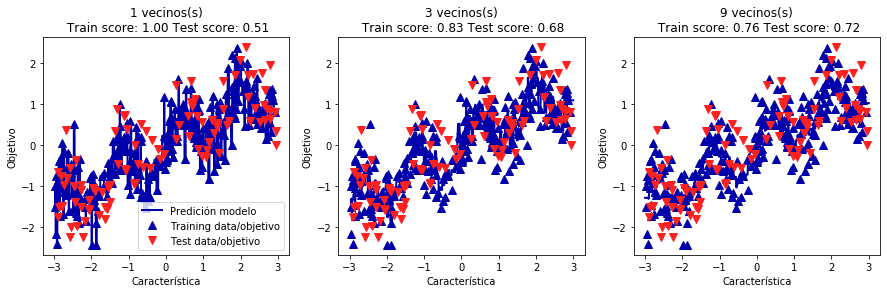

In [62]:
# Completa el código que falta

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# Crear 1,000 data points, igualmente espaciados entre -3 y 3
line=np.linspace(-3,3,1000).reshape(-1,1)


for n_neighbors, ax in zip([1, 3, 9], axes):
    # Hacer predicciones usando 1, 3 o 9 vecinos
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    print(n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} vecinos(s)\n Train score: {:.2f} Test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Característica")
    ax.set_ylabel("Objetivo")
axes[0].legend(["Predición modelo", "Training data/objetivo",
                "Test data/objetivo"], loc="best")

## Lab 2 - Modelos lineales de regresión
\begin{align*}
\end{align*}
A continuación, se muestra el gráfico del ajuste por regresión lineal de los datos del dataset *Wave*:

In [ ]:
mglearn.plots.plot_linear_regression_wave()

### Regresión lineal, alias Ordinary Least Squares (OLS)



In [ ]:
# Importa el modelo de regresión lineal
###

# Importamos 60 muestras de make_wave
X, y = mglearn.datasets.make_wave(n_samples=60)
# Separamos train y test
X_train, X_test, y_train, y_test = ####

# Entrenamos
lr = ####

In [ ]:
# Mostramos coeficientes y término de corte
print("lr.coef_:", ####)
print("lr.intercept_:", ####)

In [ ]:
# Mostramos rendimientos
print("Training set score: {:.2f}".format(###))
print("Test set score: {:.2f}".format(###))

El $R^2$ de test no es demasiado bueno, pero ambos se parecen.

**Pregunta: ¿qué significa esto?**


**Pregunta: ¿qué ocurriría si tuviésemos datos de más dimension
es?**



Veamos cómo se comporta OLS sobre un dataset como Boston Housing, que tiene mayor dimensionalidad (106 características). La manera de hacerlo es igual que en una dimensión:

In [ ]:
# Cargamos el dataset
X, y = mglearn.datasets.load_extended_boston()

# Creamos datasets de entrenamiento y pruebas, con random_state=0
####
# Entrenamos el modelo
lr = ####

Mostramos el rendimiento del modelo en ambos datasets:

In [ ]:
print("Training set score: {:.2f}".format(####))
print("Test set score: {:.2f}".format(####))

$R^2$ es ahora bueno en el training set, pero mucho peor en el test set.

**Pregunta: ¿Qué significa esto?**

### Regresión contraída, de Tikhonov, o *Ridge*

La regresión *Ridge* usa la misma fórmula que OLS, pero los coeficientes $w$ se eligen de forma que se ajusten a una limitación adicional más allá de ajustarse a los datos.

Se persigue además que los diferentes $w_i$ sean lo más pequeños posible.

**Pregunta: ¿qué puede significar esto intuitivamente?**

Veamos cómo funciona en el dataset Boston Housing con Scikit-Learn:

In [ ]:
# Importar el modelo Ridge
####

# Entrenar el modelo ridge sobre el dataset anterior
ridge = ####
# Mostrar el score para training y test
print("Training set score: {:.2f}".format(####))
print("Test set score: {:.2f}".format(####))

**Discusión**

**Ejercicio: vuelve a entrenar un Rigde sobre Boston Housing, pasando un valor de alpha = 10, y muestra los valores de $R^2$ para training y test**

In [ ]:
# Tu código aquí

**Ejercicio: Haz lo mismo pasando un valor de alpha = 0.1, y muestra los valores de $R^2$ para training y test**

In [ ]:
# Tu código aquí

**Pregunta: ¿qué funciona mejor y cómo podríamos intentar mejorarlo?**

También podemos tener una visión cualitativa más amplia si inspeccionamos cómo cambian los coeficientes con el valor de `alpha`. Recordemos que en Scikit-learn tenemos el valor de estos coeficientes en el atributo `coef_`.

Pintamos en un gráfico los coeficientes para los tres valores de $\alpha$:

In [ ]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="OLR")
plt.xlabel("Indice coef.")
plt.ylabel("Magnitud coef.")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

**Discusión**

Otra manera de entender la influencia de la regularización es fijar $\alpha$ e ir cambiando la cantidad de datos en el training dataset. Eso es lo que puede verse en el gráfico que sigue:

In [ ]:
mglearn.plots.plot_ridge_n_samples()

**Discusión**

### Regresión LASSO (Least Absolute Shrinkage and Selection Operator)

Vamos a aplicar la técnica LASSO al dataset de Boston Housing:

In [ ]:
# Importar Lasso
####

# Entrenar el modelo
lasso = ####

# Mostrar scores para training y test
print("Training set score: {:.2f}".format(####))
print("Test set score: {:.2f}".format(####))
# Contar los coeficientes (características) usadas
print("Características usadas:", ####)

**Discusión**

In [ ]:
# Decrementamos el valor de alpha, prueba por ejemplo 0.01
# Incrementamos el número de "max_iter",
# De otra forma, el modelo nos advertirá de que deberíamos incrementarlo.
# Entrena el modelo
lasso001 = ####

# Vuelve a imprimir scores y características como más arriba, esta vez para este modelo
####
####
####

**Discusión**

In [ ]:
# Decrementa aún más alpha, por ejemplo a 0.001
lasso001 = ###

# Vuelve a imprimir scores y características como más arriba, esta vez para este modelo
####
####
####

Una vez más, podemos pintar los coeficientes de los modelos anteriores con valores distintos de `alpha`:

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Indice del coeficiente")
plt.ylabel("Magnitud del coeficiente")

**Discusión**